<a href="https://colab.research.google.com/github/JLettsSJU931/AI/blob/main/HW3/Assignment3_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1: Modify AStarMaze to compare the behaviors of the Greedy Best-First and A* search algorithms. You need to modify the maze configuration so you can visually observe differences in the optimum paths generated by the two algorithms. Your report should include a side-by-side comparison of the two approaches similar to the graph shown below along with your explanation. You only need to draw the shortest paths and not the highlighted frontiers.

Maze Comparison:

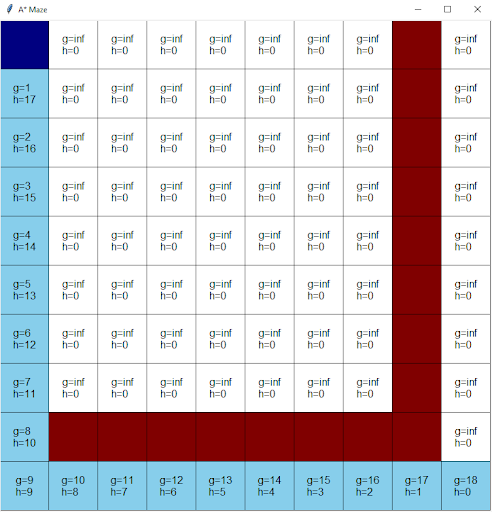

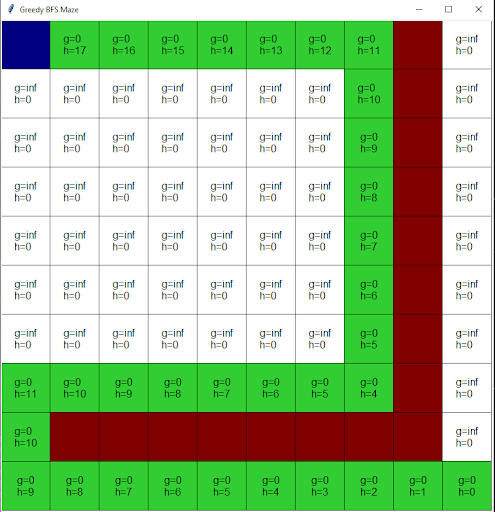

Code:

In [ ]:
    def find_path(self):
        open_set = PriorityQueue()

        #### Add the start state to the queue
        open_set.put((0, self.agent_pos))

        #### Continue exploring until the queue is exhausted
        while not open_set.empty():
            current_cost, current_pos = open_set.get()
            current_cell = self.cells[current_pos[0]][current_pos[1]]

            #### Stop if goal is reached
            if current_pos == self.goal_pos:
                self.reconstruct_path()
                break


            #### Agent goes E, W, N, and S, whenever possible
            for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
                new_pos = (current_pos[0] + dx, current_pos[1] + dy)

                if 0 <= new_pos[0] < self.rows and 0 <= new_pos[1] < self.cols and not self.cells[new_pos[0]][new_pos[1]].is_wall:

                    #### The cost of moving to a new position is 1 unit
                    new_g = current_cell.g + 1


                    if new_g < self.cells[new_pos[0]][new_pos[1]].g:
                        ### Update the path cost g()
                        self.cells[new_pos[0]][new_pos[1]].g = new_g

                        ### Update the heurstic h()
                        self.cells[new_pos[0]][new_pos[1]].h = self.heuristic(new_pos)

                        ### Update the evaluation function for the cell n: f(n) = g(n) + h(n)
                        self.cells[new_pos[0]][new_pos[1]].f = new_g + self.cells[new_pos[0]][new_pos[1]].h
                        self.cells[new_pos[0]][new_pos[1]].parent = current_cell

                        #### Add the new cell to the priority queue
                        open_set.put((self.cells[new_pos[0]][new_pos[1]].f, new_pos))

    ############################################################
    #### Greedy BFS Algorithm
    ############################################################
    def greedily_find_path(self):
        open_set = PriorityQueue()

        #### Add the start state to the queue
        open_set.put((0, self.agent_pos))

        #### Continue exploring until the queue is exhausted
        while not open_set.empty():
            current_cost, current_pos = open_set.get()
            current_cell = self.cells[current_pos[0]][current_pos[1]]

            #### Stop if goal is reached
            if current_pos == self.goal_pos:
                self.reconstruct_path()
                break


            #### Agent goes E, W, N, and S, whenever possible
            for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
                new_pos = (current_pos[0] + dx, current_pos[1] + dy)

                if 0 <= new_pos[0] < self.rows and 0 <= new_pos[1] < self.cols and not self.cells[new_pos[0]][new_pos[1]].is_wall:

                    #### The cost of moving to a new position is 1 unit
                    new_g = 0


                    if new_g < self.cells[new_pos[0]][new_pos[1]].g:
                        ### Update the path cost g()
                        self.cells[new_pos[0]][new_pos[1]].g = new_g

                        ### Update the heurstic h()
                        self.cells[new_pos[0]][new_pos[1]].h = self.heuristic(new_pos)

                        ### Update the evaluation function for the cell n: f(n) = g(n) + h(n)
                        self.cells[new_pos[0]][new_pos[1]].f = new_g + self.cells[new_pos[0]][new_pos[1]].h
                        self.cells[new_pos[0]][new_pos[1]].parent = current_cell

                        #### Add the new cell to the priority queue
                        open_set.put((self.cells[new_pos[0]][new_pos[1]].f, new_pos))

Problem 2: Repeat the above experiment but this time:

*   Use the Euclidean Distance heuristic.
*   The agent is allowed to make diagonal moves (i.e., NE, NW, SE, SW) in addition to the usual N, S, E, and W moves.
*   The moves are made randomly and not in any specific order.

Maze Comparison:

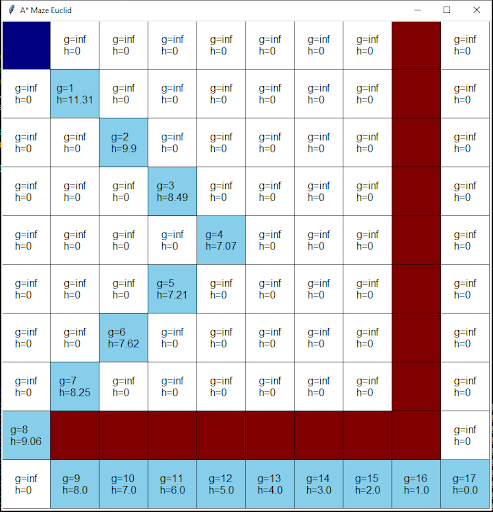

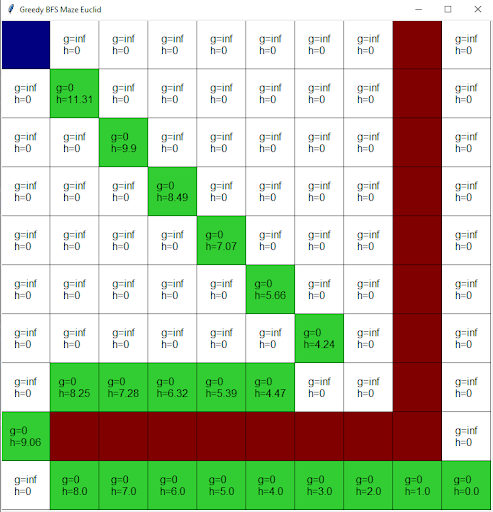

Code:

In [ ]:
def heuristic(self, pos):
        return round(math.sqrt((pos[0] - self.goal_pos[0])**2 + (pos[1] - self.goal_pos[1])**2), 2)



    ############################################################
    #### A* Algorithm
    ############################################################
    def find_path(self):
        open_set = PriorityQueue()

        #### Add the start state to the queue
        open_set.put((0, self.agent_pos))

        #### Continue exploring until the queue is exhausted
        while not open_set.empty():
            current_cost, current_pos = open_set.get()
            current_cell = self.cells[current_pos[0]][current_pos[1]]

            #### Stop if goal is reached
            if current_pos == self.goal_pos:
                self.reconstruct_path()
                break


            #### Agent goes E, W, N, and S, or a combination of the two, whenever possible
            for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]:
                new_pos = (current_pos[0] + dx, current_pos[1] + dy)

                if 0 <= new_pos[0] < self.rows and 0 <= new_pos[1] < self.cols and not self.cells[new_pos[0]][new_pos[1]].is_wall:

                    #### The cost of moving to a new position is 1 unit
                    new_g = current_cell.g + 1


                    if new_g < self.cells[new_pos[0]][new_pos[1]].g:
                        ### Update the path cost g()
                        self.cells[new_pos[0]][new_pos[1]].g = new_g

                        ### Update the heurstic h()
                        self.cells[new_pos[0]][new_pos[1]].h = self.heuristic(new_pos)

                        ### Update the evaluation function for the cell n: f(n) = g(n) + h(n)
                        self.cells[new_pos[0]][new_pos[1]].f = new_g + self.cells[new_pos[0]][new_pos[1]].h
                        self.cells[new_pos[0]][new_pos[1]].parent = current_cell

                        #### Add the new cell to the priority queue
                        open_set.put((self.cells[new_pos[0]][new_pos[1]].f, new_pos))

    ############################################################
    #### Greedy BFS Algorithm
    ############################################################
    def greedily_find_path(self):
        open_set = PriorityQueue()

        #### Add the start state to the queue
        open_set.put((0, self.agent_pos))

        #### Continue exploring until the queue is exhausted
        while not open_set.empty():
            current_cost, current_pos = open_set.get()
            current_cell = self.cells[current_pos[0]][current_pos[1]]

            #### Stop if goal is reached
            if current_pos == self.goal_pos:
                self.reconstruct_path()
                break


            #### Agent goes E, W, N, and S, or a combination of the two, whenever possible
            for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]:
                new_pos = (current_pos[0] + dx, current_pos[1] + dy)

                if 0 <= new_pos[0] < self.rows and 0 <= new_pos[1] < self.cols and not self.cells[new_pos[0]][new_pos[1]].is_wall:

                    #### The cost of moving to a new position is 1 unit
                    new_g = 0


                    if new_g < self.cells[new_pos[0]][new_pos[1]].g:
                        ### Update the path cost g()
                        self.cells[new_pos[0]][new_pos[1]].g = new_g

                        ### Update the heurstic h()
                        self.cells[new_pos[0]][new_pos[1]].h = self.heuristic(new_pos)

                        ### Update the evaluation function for the cell n: f(n) = g(n) + h(n)
                        self.cells[new_pos[0]][new_pos[1]].f = new_g + self.cells[new_pos[0]][new_pos[1]].h
                        self.cells[new_pos[0]][new_pos[1]].parent = current_cell

                        #### Add the new cell to the priority queue
                        open_set.put((self.cells[new_pos[0]][new_pos[1]].f, new_pos))

Problem 3:

The evaluation function in AstarMaze is defined as f(n) = g(n) + h(n). A weighted version of the function can be defined as:

f(n) =
 a * g(n) +
  b * h(n)  

1. Explain how different values of
 "a" and "b"
  affect the A* algorithm's behavior. Tabulate your results:

 2. "b" can be considered the algorithm's bias towards states that are closer to goal. Run the algorithm for various values of the bias to determine what changes, if any, are observed in the optimum path. Include screenshots of the path for each specific value of "b"
 along with your explanation.

 Table:

 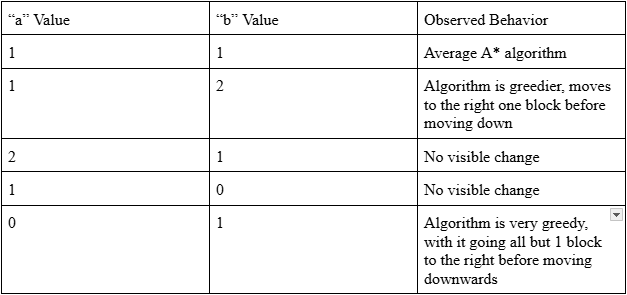

From what can be observed, everytime "b" is increased, the path moves another block to the right, becoming more and more like Greedy BFS with every increase. This is until b=4, after which it doesnt increase until b=7. After b=7, it doesnt increase until b=14, which is the last value that changes the graph, with not even a value of 400000 didnt increase the resemblance to greedy bfs. So to summarize, as b increases, the resemblance to greedy bfs also increases, but it will never become a perfect copy of it.

b=1

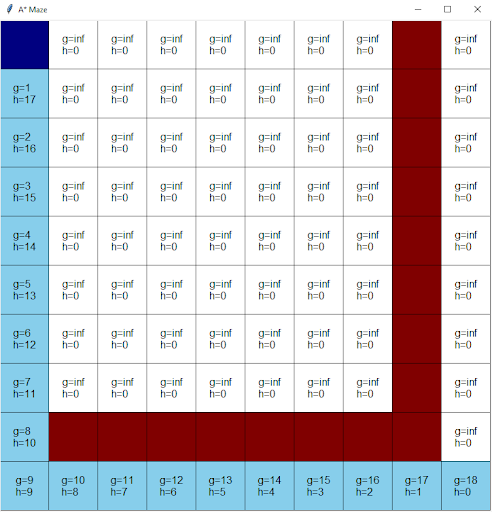

b=2

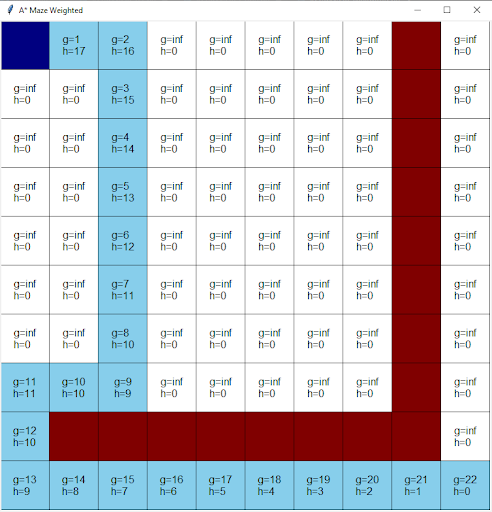

b=3

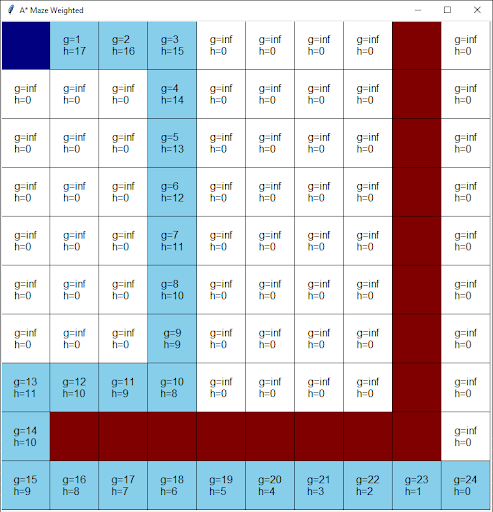

b=4

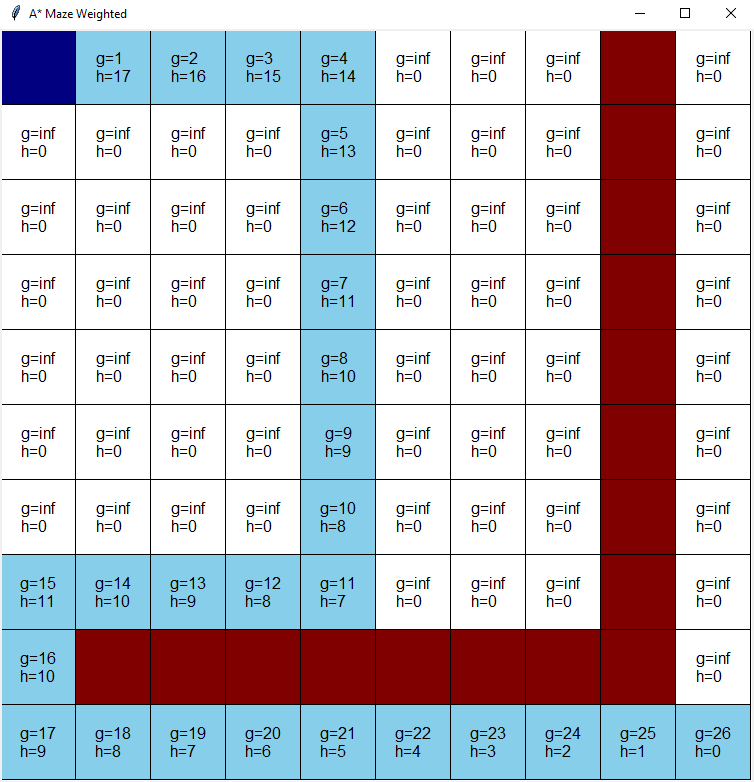

b=7

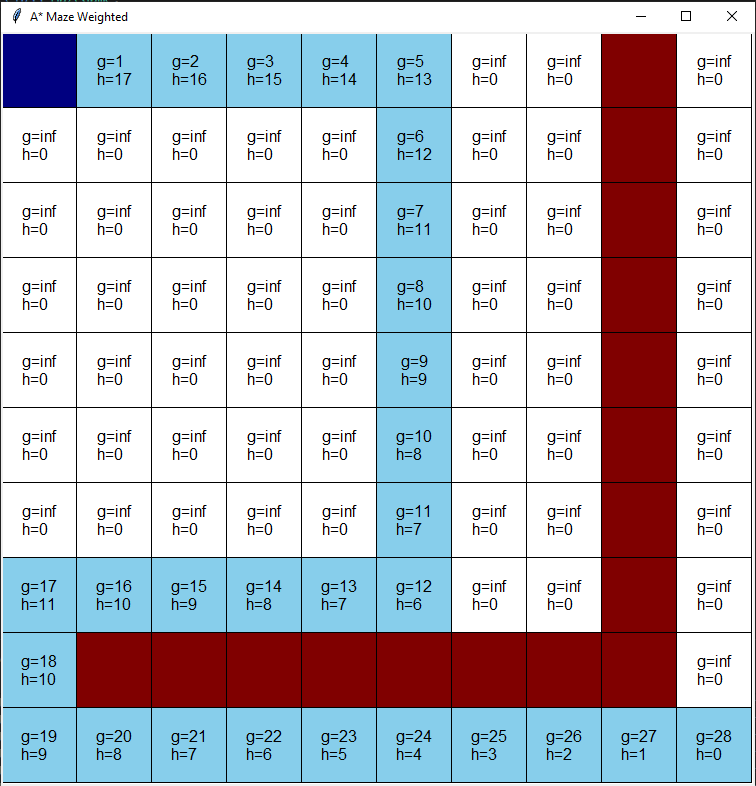

b=14

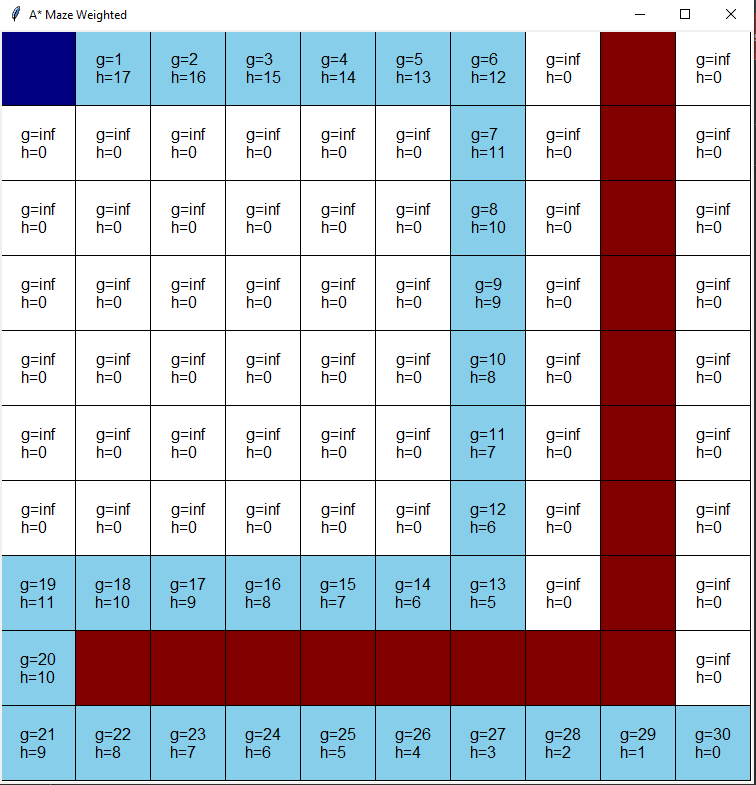

Code:

In [ ]:
    ############################################################
    #### Manhattan distance
    ############################################################
    def heuristic(self, pos):
        return (abs(pos[0] - self.goal_pos[0]) + abs(pos[1] - self.goal_pos[1]))



    ############################################################
    #### A* Algorithm
    ############################################################
    def find_path(self):
        open_set = PriorityQueue()

        #### Add the start state to the queue
        open_set.put((0, self.agent_pos))

        #### added weights to place on g(n) and h(n)
        W_a = 1
        W_b = 1
        #### Continue exploring until the queue is exhausted
        while not open_set.empty():
            current_cost, current_pos = open_set.get()
            current_cell = self.cells[current_pos[0]][current_pos[1]]

            #### Stop if goal is reached
            if current_pos == self.goal_pos:
                self.reconstruct_path()
                break


            #### Agent goes E, W, N, and S, whenever possible
            for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
                new_pos = (current_pos[0] + dx, current_pos[1] + dy)

                if 0 <= new_pos[0] < self.rows and 0 <= new_pos[1] < self.cols and not self.cells[new_pos[0]][new_pos[1]].is_wall:

                    #### The cost of moving to a new position is 1 unit
                    new_g = current_cell.g + 1


                    if new_g < self.cells[new_pos[0]][new_pos[1]].g:
                        ### Update the path cost g()
                        self.cells[new_pos[0]][new_pos[1]].g = new_g

                        ### Update the heurstic h()
                        self.cells[new_pos[0]][new_pos[1]].h = self.heuristic(new_pos)

                        ### Update the evaluation function for the cell n: f(n) = g(n) + h(n)
                        self.cells[new_pos[0]][new_pos[1]].f = W_a*new_g + W_b*self.cells[new_pos[0]][new_pos[1]].h
                        self.cells[new_pos[0]][new_pos[1]].parent = current_cell

                        #### Add the new cell to the priority queue
                        open_set.put((self.cells[new_pos[0]][new_pos[1]].f, new_pos))

Problem 4:

Leetcode 1631: Path With Minimum Effort using Dijkstra's Algorithm

Submission:

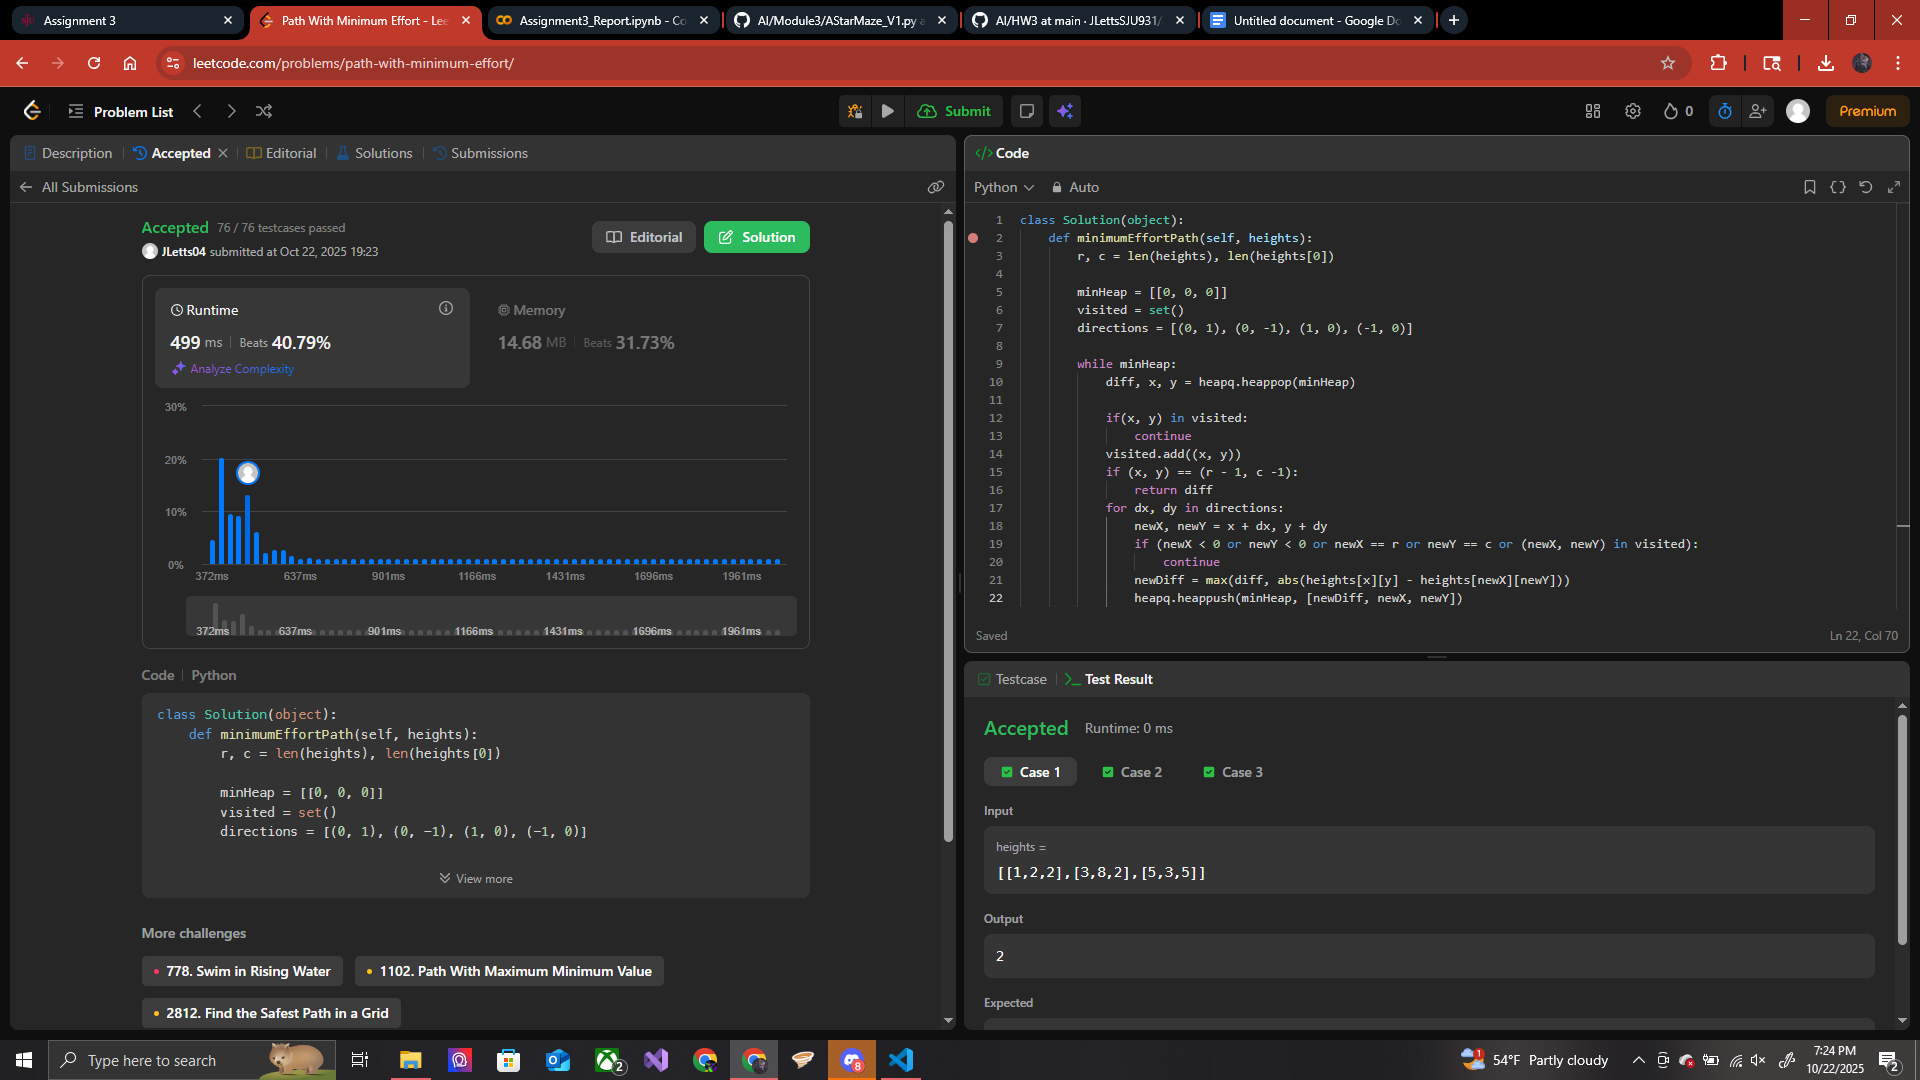

Code:

In [ ]:
class Solution(object):
    def minimumEffortPath(self, heights):
        r, c = len(heights), len(heights[0])

        minHeap = [[0, 0, 0]]
        visited = set()
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

        while minHeap:
            diff, x, y = heapq.heappop(minHeap)

            if(x, y) in visited:
                continue
            visited.add((x, y))
            if (x, y) == (r - 1, c -1):
                return diff
            for dx, dy in directions:
                newX, newY = x + dx, y + dy
                if (newX < 0 or newY < 0 or newX == r or newY == c or (newX, newY) in visited):
                    continue
                newDiff = max(diff, abs(heights[x][y] - heights[newX][newY]))
                heapq.heappush(minHeap, [newDiff, newX, newY])